In [2]:
import pandas as pd
from pathlib import Path

data = './garbage-dataset'

# Conversion to Dataframe for EDA
paths = [path.parts[-2:] for path in Path(data).rglob('*.*')]  
df = pd.DataFrame(data=paths, columns=['Class', 'Images'])     # create column names for dataframe
df = df.sort_values('Class', ascending=True)                 # sort class name
df.reset_index(drop=True, inplace=True)                      # sort index of each row
display(df)                                                  

,Class,Images
0,battery,battery_1.jpg
1,battery,battery_66.jpg
2,battery,battery_660.jpg
3,battery,battery_661.jpg
4,battery,battery_662.jpg
...,...,...
19757,trash,trash_235.jpg
19758,trash,trash_236.jpg
19759,trash,trash_238.jpg
19760,trash,trash_225.jpg


In [3]:
# Total Count of Images
count = df['Images'].count()                               
print (f'Total number of images: {count}')                  

Total number of images: 19762


In [4]:
# Count of Images in Each Class
class_counts = df.groupby('Class').size().reset_index(name='Image Count')
display(class_counts)

,Class,Image Count
0,battery,944
1,biological,997
2,cardboard,1825
3,clothes,5327
4,glass,3061
5,metal,1020
6,paper,1680
7,plastic,1984
8,shoes,1977
9,trash,947


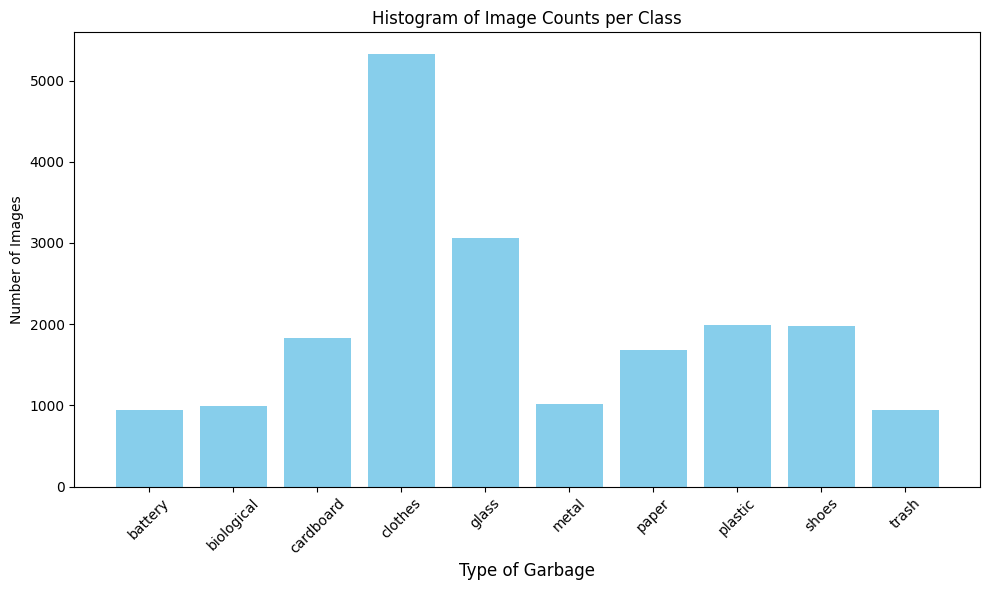

In [5]:
import matplotlib.pyplot as plt

# Histogram of Image Counts per Class
plt.figure(figsize=(10, 6))
plt.bar(class_counts['Class'], class_counts['Image Count'], color='skyblue')
plt.xlabel('Type of Garbage', fontsize=12)
plt.ylabel('Number of Images')
plt.title('Histogram of Image Counts per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Percentage of Images in Each Class
percentage = (class_counts['Image Count'] / count) * 100
print("\nPercentage of Images in Each Class:")
for i in range(len(class_counts)):
    print(f"{class_counts['Class'][i]}: {percentage[i]:.2f}%")
    


Percentage of Images in Each Class:
battery: 4.78%
biological: 5.05%
cardboard: 9.23%
clothes: 26.96%
glass: 15.49%
metal: 5.16%
paper: 8.50%
plastic: 10.04%
shoes: 10.00%
trash: 4.79%


,Class,Images,Color Type
0,battery,battery_1.jpg,RGB
1,battery,battery_66.jpg,RGB
2,battery,battery_660.jpg,RGB
3,battery,battery_661.jpg,RGBA
4,battery,battery_662.jpg,RGB
...,...,...,...
19757,trash,trash_235.jpg,RGB
19758,trash,trash_236.jpg,RGB
19759,trash,trash_238.jpg,RGB
19760,trash,trash_225.jpg,RGB


,Color Type,Image Count
0,CMYK,2
1,L,1
2,P,18
3,RGB,19017
4,RGBA,724


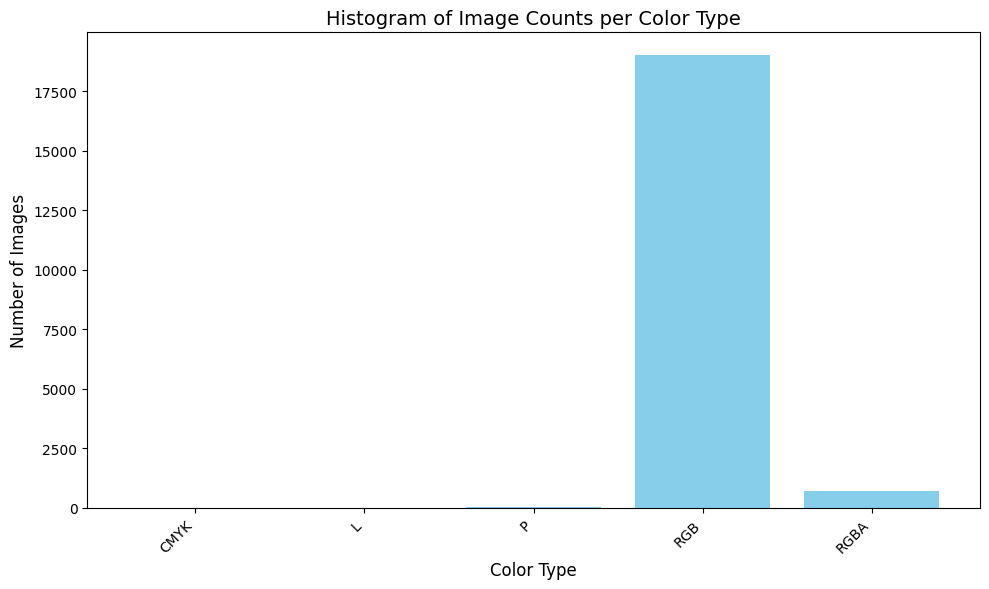

In [7]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Determine the color type of an image
def get_image_color_type(image_path):
    with Image.open(image_path) as img:
        if img.mode in ['L', 'RGB', 'RGBA', 'P', 'CMYK']:
            return img.mode  # Return the mode directly if it's one of the known types
        else:
            return 'Other'  # For any other modes not explicitly handled

# Add a new column to the DataFrame for color type
df['Color Type'] = df.apply(
    lambda row: get_image_color_type(os.path.join(data, row['Class'], row['Images'])),
    axis=1
)
display(df)


# Count the number of images by color type
color_counts = df.groupby('Color Type').size().reset_index(name='Image Count')
display(color_counts)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(color_counts['Color Type'], color_counts['Image Count'], color='skyblue')
plt.xlabel('Color Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Histogram of Image Counts per Color Type', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

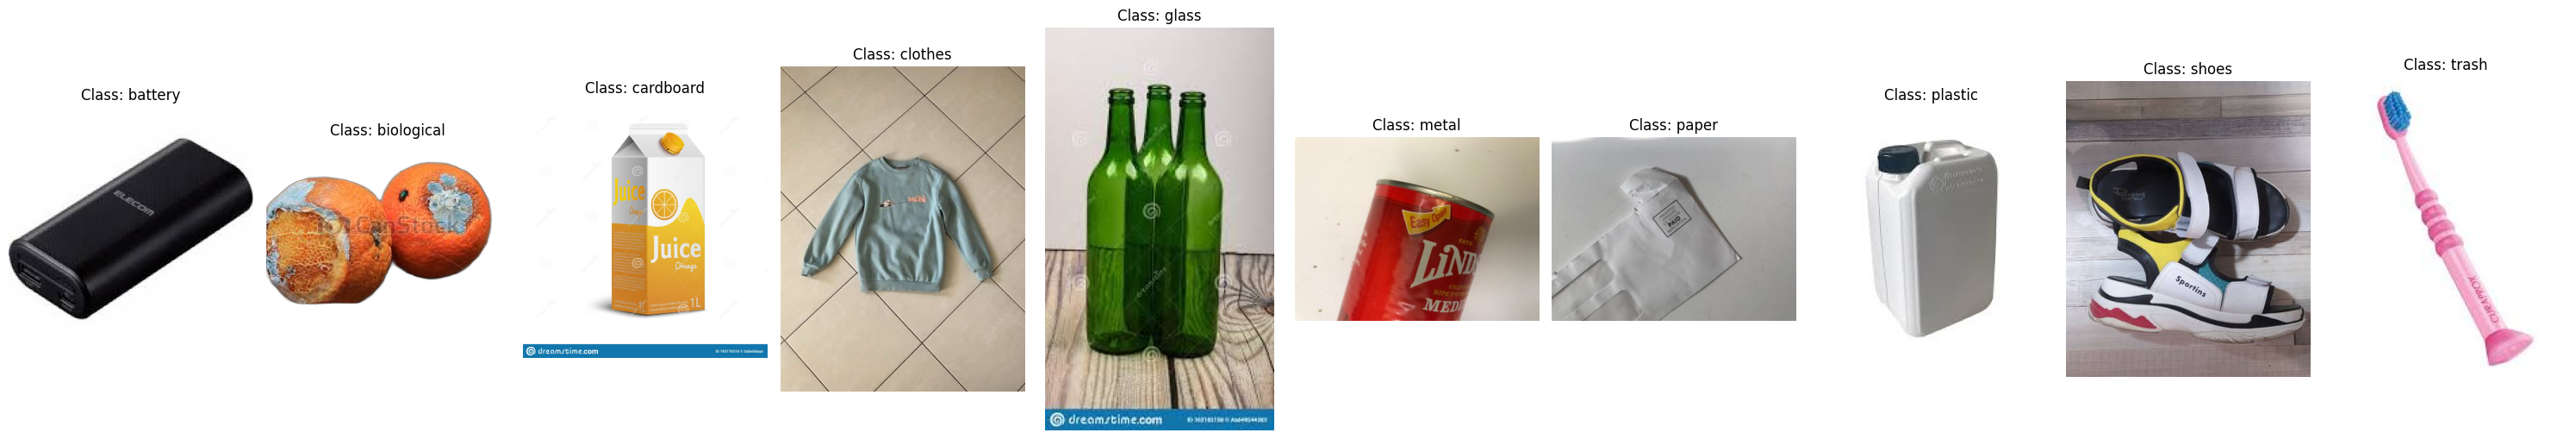

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to display one image per class
def display_one_image_per_class(df, data_dir):
    """
    Displays one image for each class in the dataset.

    Args:
        df: DataFrame containing image file paths and class labels.
        data_dir: Path to the dataset directory.
    """
    # Group by class and sample one image per class
    sampled_df = df.groupby('Class').sample(n=1, random_state=42).reset_index(drop=True)
    num_classes = len(sampled_df)
    
    # Create a grid for displaying images
    fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 3, 5))
    
    for i in range(num_classes):
        # Get the class and image file name
        class_name = sampled_df.iloc[i]['Class']
        image_name = sampled_df.iloc[i]['Images']
        
        # Construct the full image path
        image_path = os.path.join(data_dir, class_name, image_name)
        
        # Open and display the image
        with Image.open(image_path) as img:
            axes[i].imshow(img)
            axes[i].set_title(f"Class: {class_name}")
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display one image per class
display_one_image_per_class(df, data)

,Class,Images,Color Type,Format
0,battery,battery_1.jpg,RGB,JPEG
1,battery,battery_66.jpg,RGB,JPEG
2,battery,battery_660.jpg,RGB,JPEG
3,battery,battery_661.jpg,RGBA,PNG
4,battery,battery_662.jpg,RGB,JPEG
...,...,...,...,...
19757,trash,trash_235.jpg,RGB,JPEG
19758,trash,trash_236.jpg,RGB,JPEG
19759,trash,trash_238.jpg,RGB,JPEG
19760,trash,trash_225.jpg,RGB,JPEG


,Format,Image Count
0,JPEG,19006
1,MPO,6
2,PNG,747
3,WEBP,3


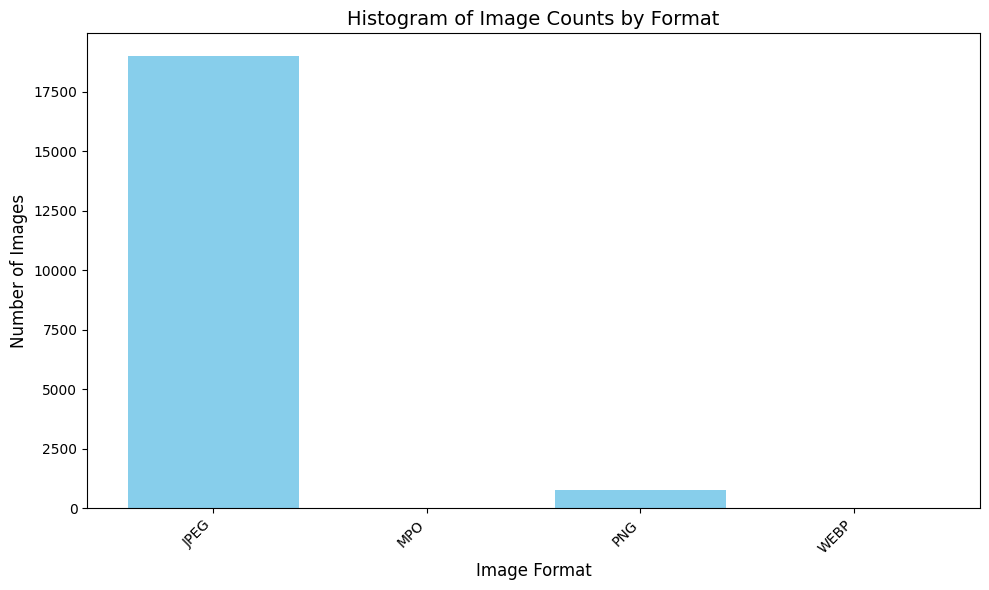

In [ ]:
# Image format
def get_image_format(image_path):
    try:
        with Image.open(image_path) as img:
            return img.format  # Returns the format (e.g., JPEG, PNG)
    except Exception as e:
        return 'Unknown'  # Handle cases where the image cannot be opened

# Add a new column to the DataFrame for image format
df['Format'] = df.apply(
    lambda row: get_image_format(os.path.join(data, row['Class'], row['Images'])),
    axis=1
)
display(df)

# Count the number of images by format
format_counts = df.groupby('Format').size().reset_index(name='Image Count')
display(format_counts)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(format_counts['Format'], format_counts['Image Count'], color='skyblue')
plt.xlabel('Image Format', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Histogram of Image Counts by Format', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()